# Proyek Analisis Data: Bike Sharing
- Nama: Muhammad Fadli Syukur
- Email: muhammadfadlisyukur16@gmail.com
- Id Dicoding: 733886

## Menentukan Pertanyaan Bisnis

- Bagaimana total penyewaan sepeda terhadap periode waktu tertentu?
- Bagaimana dampak musim terhadap persewaan sepeda?

## Menyaipkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Learn Data/Project Case Study/Dicoding/Belajar Data Analysis/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Sebagai permulaan dalam tahap Asessing Data, Saya memeriksa apakah terdapat duplikasi data.

In [ ]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data. Selanjutnya saya memeriksa tipe data dari setiap kolom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada hasil diatas menunjukkan jumlah data sudah lengkap dan tidak ada missing value. Akan tetapi terdapat kesalahan tipe data pada kolom 'dteday', kolom tersebut harusnya bertipa datetima. Selanjutnya Saya memeriksa deskripsi data.

In [ ]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada hasil deskripsi diatas, tidak terdapat keanehan pada data dan semua nilainya masih masuk akal.

**Kesimpulan**

Dari hasil Assessing Data diatas, dapat diambil kesimpulan dan tindakan diantaranya:
1. Tidak ada missing value dan nilai duplikat pada data
2. Mengubah tipe data pada kolom 'dteday' menjadi tipe data datetime
3. Untuk mempermudah analisis saya akan mengubah nilai kategorikal yang masih berupa numeric menjadi string. Misalnya kolom weekday (0:'sunday', 1:'monday' dst.)

### Cleaning Data

Dari proses assesing data diketahui bahwa data tidak terdapat missing value dan duplikat data. Tapi ada yang harus ditangani pada proses cleaning data, yaitu:


**Mengubah tipe data paada kolom 'dteday' menjadi tipe data datetime**

In [ ]:
data['dteday'] = pd.to_datetime(data['dteday'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

kolom dteday sudah bertipe datetime.

In [ ]:
data['yr'] = data['dteday'].dt.year

**Mengubah Nilai Kategorikal dari numeric menjadi string**

Saya mengubah nilai ketegorikan dari numeric menjadi string agar mempermudah dalam proses pembuatan visualisasi data. Nilai kolom yang akan saya ubah adalah:
- season (1:winter, 2:spring, 3:summer, 4:fall)
- weekday (0:sunday, 1:monday, 2:tuesday, 3:wednesday, 4:thursday, 5:friday, 6:saturday)
- weathersit (1:good, 2:fog with cloud, 3:varied, 4:bad)

**Catatan:**
Pada sumber dataset dituliskan bahwa season 1 adalah spring, namun setelah mencari tau dan meriset, serta melihat dataset lainnya, ternyata sumber deskripsi pada dataset ini salah, diketahui bahwa season 1 adalah winter karena musim dingin berlangsung selama desember sampai february.

In [ ]:
# Mengubah nilai kolom season
season_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
data['season'] = data['season'].replace(season_mapping)

In [ ]:
# Mengubah nilai kolom weekday
data['weekday'] = data['dteday'].dt.strftime('%A')

In [ ]:
# Mengubah nilai kolom weathersit
weathersit_mapping = {1: 'good', 2: 'fog with cloud', 3: 'varied', 4: 'bad'}
data['weathersit'] = data['weathersit'].replace(weathersit_mapping)

In [ ]:
data.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6667,6668,2011-10-10,fall,2011,10,9,1,Monday,0,good,0.54,0.5152,0.77,0.0000,58,161,219
12564,12565,2012-06-12,spring,2012,6,17,0,Tuesday,1,fog with cloud,0.66,0.5909,0.89,0.2836,56,625,681
2895,2896,2011-05-05,spring,2011,5,13,0,Thursday,1,good,0.54,0.5152,0.30,0.5821,50,142,192
13254,13255,2012-07-11,summer,2012,7,11,0,Wednesday,1,fog with cloud,0.76,0.7121,0.58,0.1343,56,173,229
3934,3935,2011-06-17,spring,2011,6,20,0,Friday,1,good,0.64,0.5909,0.78,0.1045,40,192,232
17012,17013,2012-12-16,fall,2012,12,15,0,Sunday,0,fog with cloud,0.38,0.3939,0.82,0.1045,46,292,338
6077,6078,2011-09-15,summer,2011,9,19,0,Thursday,1,good,0.46,0.4545,0.67,0.4627,20,212,232
830,831,2011-02-07,winter,2011,2,1,0,Monday,1,good,0.22,0.2727,0.75,0.0000,1,4,5
6394,6395,2011-09-29,fall,2011,9,0,0,Thursday,1,good,0.60,0.5152,0.94,0.1940,7,33,40
3933,3934,2011-06-17,spring,2011,6,19,0,Friday,1,varied,0.64,0.5758,0.83,0.2537,53,275,328


Dari proses diatas, kita sudah membersihkan data kita dan mengganti nilai pada kolom tertentu untuk mempermudah proses visualisasi data.

## Exploratory Data Analysis

Kita sudah menentukan pertanyaan bisnis sebelumnya, proses exploratory data analysis bertujuan untuk menjawab pertanyaan bisnis tersebut. Proses ini akan sangat membantu untuk mengenal data yang sedang ditangani dan membuat strategi yang paling efisien.

**Bagaimana total penyewaan sepeda terhadap periode waktu tertentu?**

In [ ]:
# Total penyewaan per tahun
data.resample(rule='Y', on='dteday')['cnt'].sum().reset_index()

,dteday,cnt
0,2011-12-31,1243103
1,2012-12-31,2049576


Diketahui bahwa adanya peningkatkan penyewaan sepeda di tahun 2012 sebanyak 2.049.576, dibandingkan tahun 2011 sebanyak 1.243.103. Hal ini merupakan kabar baik bagi bisnis karena adanya peningkatan penyewaan sepeda.

In [ ]:
# Total penyewaan per bulan
data.groupby('mnth')['cnt'].sum().sort_values(ascending=False).reset_index()

,mnth,cnt
0,8,351194
1,6,346342
2,9,345991
3,7,344948
4,5,331686
5,10,322352
6,4,269094
7,11,254831
8,3,228920
9,12,211036


Dari hasil diatas, diketahui bahwa bulan agustus, juni, dan sepetember adalah bulan yang paling banyak penyawaan sepeda. Sementara bulan januari, februari, dan december merupakan bulan yang paling sedikit penyewaan sepeda. Dugaan awal saya ini pada bulan itu memiliki musim yang berbeda sehingga kebutuhan pengguna untuk menyewa sepeda tertanggu pada musim. Untuk itu, saya akan memeriksa pengaruh musim terhadap penyewaan sepeda pada proses berikutnya.

In [ ]:
# Total penyewaan per hari dalam seminggu
data.groupby('weekday')['cnt'].sum().sort_values(ascending=False).reset_index()

,weekday,cnt
0,Friday,487790
1,Thursday,485395
2,Saturday,477807
3,Wednesday,473048
4,Tuesday,469109
5,Monday,455503
6,Sunday,444027


Diketahui bahwa hari Jumat adalah hari yang paling banyak penyawaan sepeda, sementara hari minggu adalah hari yang paling sedikit. Mungkin pengguna menyewa sepeda lebih banyak pada saat menjelang weekend dan hari kerja, namun pada hari minggu pengguna tidak banyak menyewa sepeda karena dipakai untuk beristirahat atau hal lainnya.

In [ ]:
# Total penyewaan per jam
data.groupby('hr')['cnt'].sum().sort_values(ascending=False).reset_index()

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


Pada hasil diatas dapat dilihat bahwa penyewaan sepeda tertinggi pada jam berangkat kerja dan pulan kerja. Ini sangat masuk akal karena pengguna membutuhkan sepeda sebagai alat transportasi untuk berangkat kerja.

**Bagaimana dampak musim terhadap persewaan sepeda?**

In [ ]:
data.groupby('season')['cnt'].sum().sort_values(ascending=False).reset_index()

,season,cnt
0,summer,1061129
1,spring,918589
2,fall,841613
3,winter,471348


Hasil ini menujukkan bahwa musim panas adalah musim yang paling panyak penyewaan sepeda, dan musim dingin adalah yang paling sedikit. Hal ini sangat wajar karena selain musim dingin adalah saat yang pas untuk bersepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

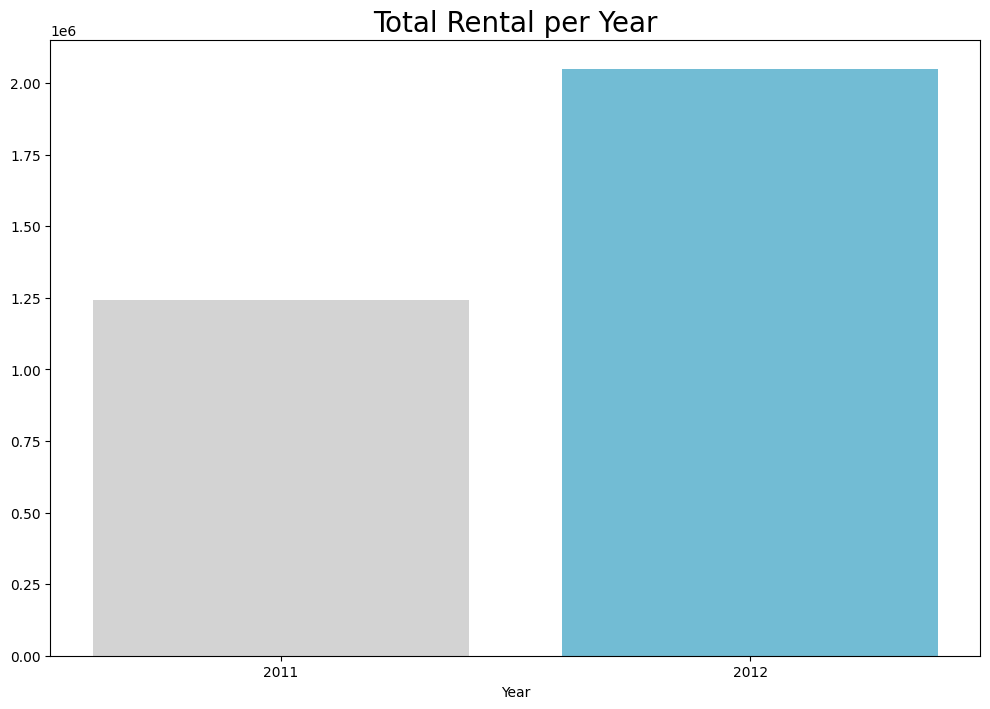

In [ ]:
# Total penyewaan per tahun
yearly_rental_df = data.groupby('yr').agg({
    'instant':'nunique',
    'cnt':'sum'
}).reset_index()

yearly_rental_df.rename(columns={
    'yr':'Year',
    'instant':'Number of User',
    'cnt':'Total of Rental'
}, inplace=True)

plt.figure(figsize=(12,8))
plt.bar(yearly_rental_df['Year'], yearly_rental_df['Total of Rental'], color=['#D3D3D3',"#72BCD4"])
plt.title('Total Rental per Year', fontsize=20)
plt.xlabel('Year')
plt.xticks(yearly_rental_df['Year'], ['2011', '2012'])
plt.show()

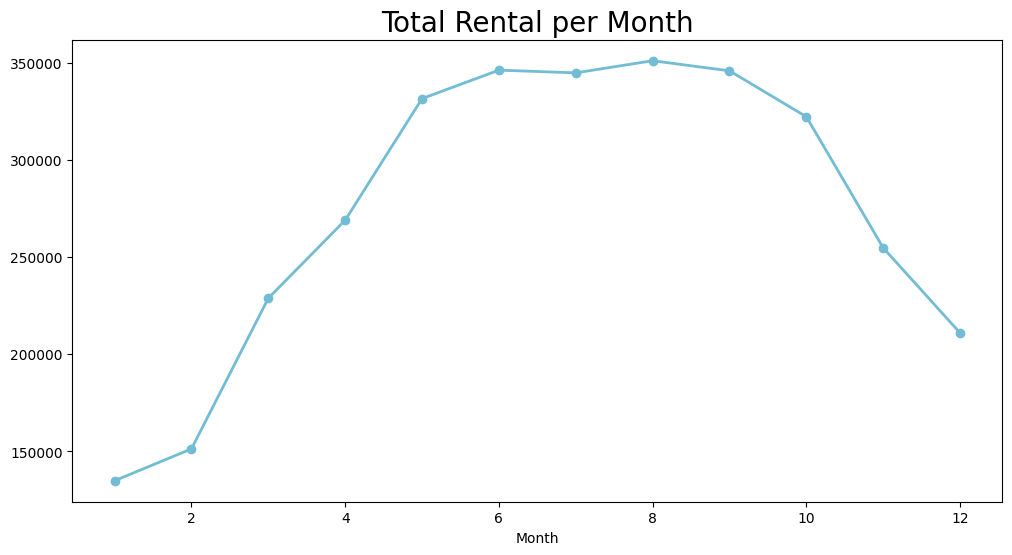

In [ ]:
# Total penyewaan per bulan
monthly_rental_df = data.groupby('mnth').agg({
    'instant':'nunique',
    'cnt':'sum'
}).reset_index()

monthly_rental_df.rename(columns={
    'mnth':'Month',
    'instant':'Number of User',
    'cnt':'Total of Rental'
}, inplace=True)

plt.figure(figsize=(12,6))
plt.plot(monthly_rental_df['Month'], monthly_rental_df['Total of Rental'], color="#72BCD4", marker='o', linewidth=2)
plt.title('Total Rental per Month', fontsize=20)
plt.xlabel('Month')
plt.show()

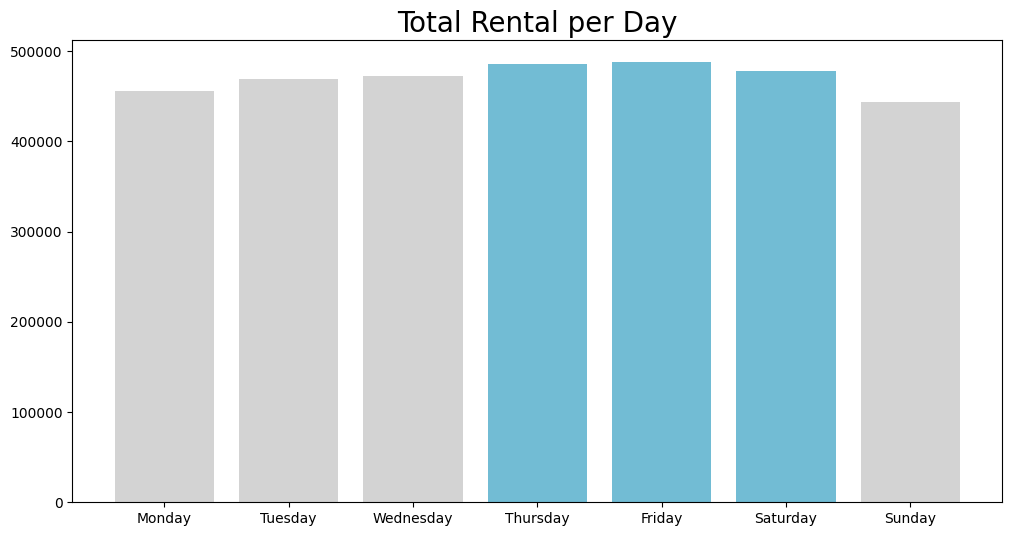

In [ ]:
# Total penyewaan per hari
daily_rental_df = data.groupby('weekday').agg({
    'instant':'nunique',
    'cnt':'sum'
}).reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rental_df['weekday'] = pd.Categorical(daily_rental_df['weekday'], categories=day_order, ordered=True)
daily_rental_df = daily_rental_df.sort_values('weekday')

daily_rental_df.rename(columns={
    'weekday':'Day',
    'instant':'Number of User',
    'cnt':'Total of Rental'
}, inplace=True)

plt.figure(figsize=(12,6))
plt.bar(daily_rental_df['Day'], daily_rental_df['Total of Rental'], color=["#D3D3D3",'#D3D3D3',"#D3D3D3",'#72BCD4',"#72BCD4",'#72BCD4','#D3D3D3'])
plt.title('Total Rental per Day', fontsize=20)
plt.show()

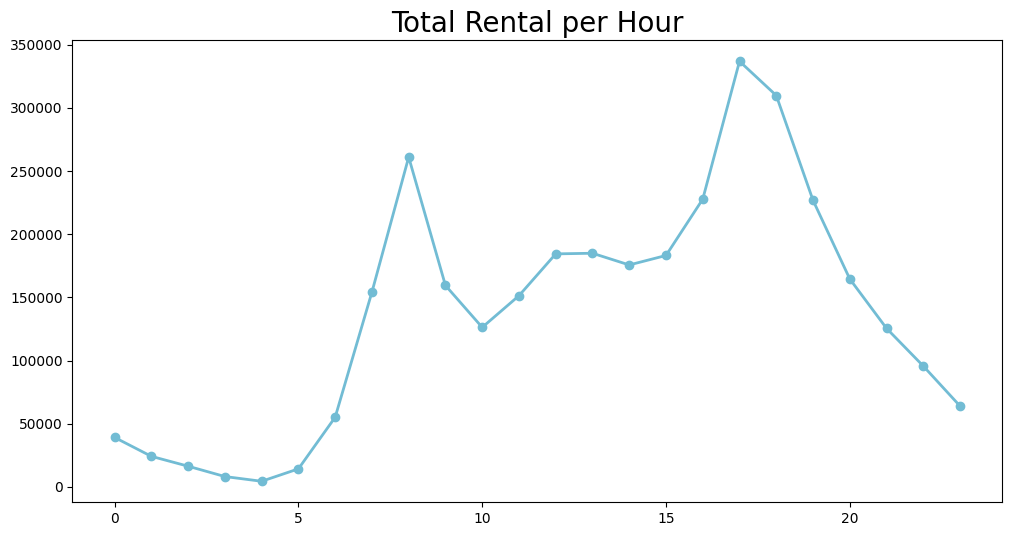

In [ ]:
# Total penyewaan per hari
hourly_rental_df = data.groupby('hr').agg({
    'instant':'nunique',
    'cnt':'sum'
}).reset_index()

hourly_rental_df.rename(columns={
    'hr':'Hour',
    'instant':'Number of User',
    'cnt':'Total of Rental'
}, inplace=True)

plt.figure(figsize=(12,6))
plt.plot(hourly_rental_df['Hour'], hourly_rental_df['Total of Rental'], color="#72BCD4", marker='o', linewidth=2)
plt.title('Total Rental per Hour', fontsize=20)
plt.show()

### Pertanyaan 2:

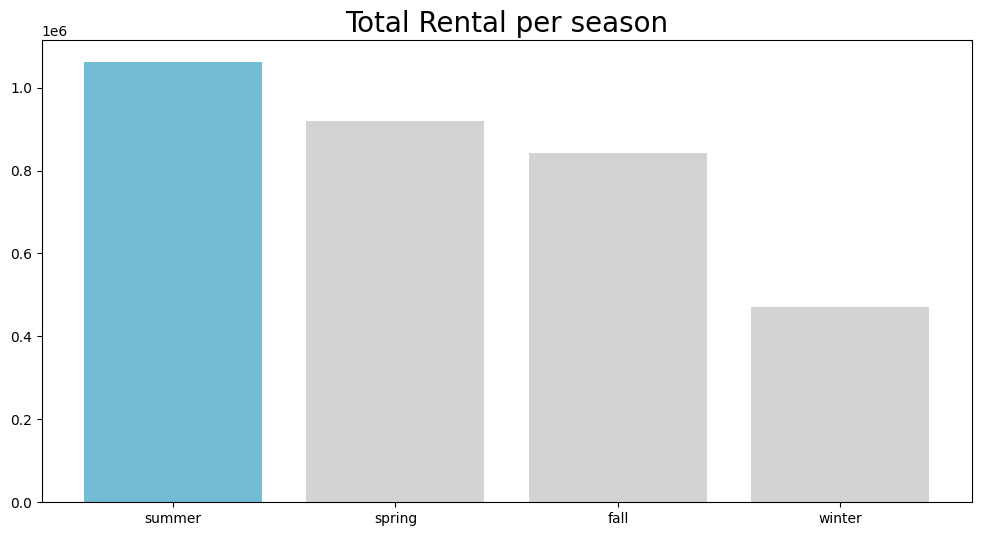

In [ ]:
# Total penyewaan berdasarkan musim
season_rental_df = data.groupby('season')['cnt'].sum().sort_values(ascending=False).reset_index()

season_rental_df.rename(columns={
    'cnt':'Total of Rental'
}, inplace=True)

plt.figure(figsize=(12,6))
plt.bar(season_rental_df['season'], season_rental_df['Total of Rental'], color=["#72BCD4",'#D3D3D3',"#D3D3D3",'#D3D3D3'])
plt.title('Total Rental per season', fontsize=20)
plt.show()

## Conclusion

- Dari pertanyaan analisis 1, dapat disimpulkan bahwa
  - Terjadi kenaikan pada tahun 2012 sebanyak 2.049.576, dibandingkan tahun 2011 sebanyak 1.243.103. Hal ini merupakan kabar baik bagi bisnis karena adanya peningkatan penyewaan sepeda.
  - Rentang penyewaan sepeda tertinggi berdasarkan bulan adalah dari bulai Mei sampai Oktober, dan bulan paling tinggi total penyewaannya adalah bulan Agustus.
  - Penyewaan berdasarkan hari paling banyak terjadi pada saat menjelang weekend, dan hari minggu adalah hari terendah. Karena mungkin dipakai untuk beristirahat atau hal lainnya.
  - Pada hasil diatas dapat dilihat bahwa penyewaan sepeda tertinggi pada jam berangkat kerja dan pulan kerja. Ini sangat masuk akal karena pengguna membutuhkan sepeda sebagai alat transportasi untuk berangkat kerja.
- conclution pertanyaan 2
  Terdapat hubungan antara penyewaan sepeda terhadap musim, musim panas adalah musim dengan total penyewaan sepeda paling tinggi, sedangkan musim dinggin adalah musim dengan total penyewaan sepeda terendah. Ini masuk akal karena selain musim dingin merupakan musim yang pas untuk bersepeda.

In [ ]:
data.to_csv("data.csv", index=False)